In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [5]:
df = pd.read_csv(r"C:\Users\Prasad\Desktop\ml\data_ml\possum.csv")

In [7]:
df.head()

case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0

In [9]:
df.describe()

case        site         age     hdlngth      skullw    totlngth  \
count  104.000000  104.000000  102.000000  104.000000  104.000000  104.000000   
mean    52.500000    3.625000    3.833333   92.602885   56.883654   87.088462   
std     30.166206    2.349086    1.909244    3.573349    3.113426    4.310549   
min      1.000000    1.000000    1.000000   82.500000   50.000000   75.000000   
25%     26.750000    1.000000    2.250000   90.675000   54.975000   84.000000   
50%     52.500000    3.000000    3.000000   92.800000   56.350000   88.000000   
75%     78.250000    6.000000    5.000000   94.725000   58.100000   90.000000   
max    104.000000    7.000000    9.000000  103.100000   68.600000   96.500000   

            taill    footlgth    earconch         eye       chest       belly  
count  104.000000  103.000000  104.000000  104.000000  104.000000  104.000000  
mean    37.009615   68.459223   48.130769   15.046154   27.000000   32.586538  
std      1.959518    4.395306    4.109380    1.050374    2.045597    2.761949  
min     32.000000   60.300000   40.300000   12.800000   22.000000   25.000000  
25%     35.875000   64.600000   44.800000   14.400000   25.500000   31.000000  
50%     37.000000   68.000000   46.800000   14.900000   27.000000   32.500000  
75%     38.000000   72.500000   52.000000   15.725000   28.000000   34.125000  
max     43.000000   77.900000   56.200000   17.800000   32.000000   40.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [15]:
X = df.drop(['hdlngth','case'], axis=1)
y = df['hdlngth']

In [17]:
X.isnull().sum()

site        0
Pop         0
sex         0
age         2
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

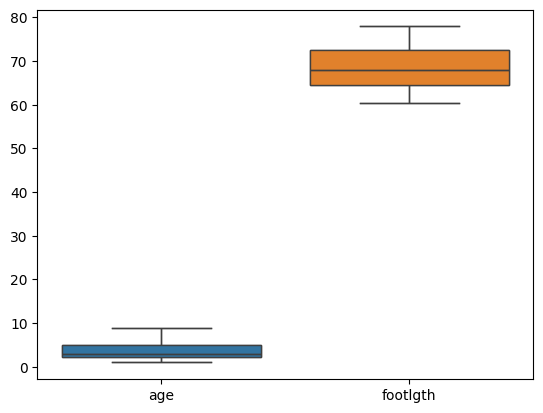

In [27]:
sns.boxplot(df[['age','footlgth']])
plt.show()

In [29]:
df['age'][df['age'].isnull()] = df['age'].mean()

C:\Users\Prasad\AppData\Local\Temp\ipykernel_3348\3206725951.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['age'][df['age'].isnull()] = df['age'].mean()
C:\Users\Prasad\AppData\Local\Temp\ipykernel_3348\3206725951.py:1: SettingWithC

In [33]:
df['age'].isnull().sum()

0

In [35]:
df['footlgth'][df['footlgth'].isnull()] = df['footlgth'].mean()

C:\Users\Prasad\AppData\Local\Temp\ipykernel_3348\1467177683.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['footlgth'][df['footlgth'].isnull()] = df['footlgth'].mean()
C:\Users\Prasad\AppData\Local\Temp\ipykernel_3348\1467177683.py:

In [37]:

df['footlgth'].isnull().sum()

0

In [39]:
df.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [41]:
for col in df.columns:
    if(df[col].dtype== object):
        le = LabelEncoder()
        X[col] = le.fit_transform(df[col])
    elif(df[col].dtype in [int, float]):
        scaler = StandardScaler()
        X[col] = scaler.fit_transform(df[col].values.reshape(-1,1))
X

site  Pop  sex       age    skullw  totlngth     taill  footlgth  \
0       1    0    1  2.214538  1.134883  0.445603 -0.517732  1.387779   
1       1    0    0  1.151560  0.231197  1.028384 -0.261331  0.928309   
2       1    0    0  1.151560  1.005785  1.960834  1.020671  1.594541   
3       1    0    0  1.151560  0.069825  1.144941  0.507870  1.755355   
4       1    0    0 -0.974397 -0.188371 -0.370290 -0.517732  0.583706   
..    ...  ...  ...       ...       ...       ...       ...       ...   
99      7    1    1 -1.505886 -0.285195 -1.302740 -0.261331 -0.564970   
100     7    1    1 -1.505886 -0.704763 -1.069627  1.020671 -0.932546   
101     7    1    0  1.151560 -0.607940  0.445603  0.507870 -1.139308   
102     7    1    1  0.088582 -0.543391 -1.069627 -0.261331 -1.277149   
103     7    1    0 -0.442908  0.973511  0.445603  1.533472 -0.197394   

     earconch       eye     chest     belly   hdlngth  
0    1.557431  0.147177  0.491222  1.241874  0.420996  
1    0.750501  0.912499  0.736833  0.150424 -0.028932  
2    0.921668  0.434173  1.473667  0.514241  0.392875  
3    0.995025  0.147177  0.491222  0.514241  0.167912  
4    1.239549  0.051512  0.736833  0.150424 -0.310136  
..        ...       ...       ...       ...       ...  
99  -0.325405 -0.235484 -1.964889 -2.032475 -0.872546  
100 -0.031976 -1.000805 -0.982445  0.150424 -1.125630  
101 -0.667739 -1.957457 -0.982445 -0.941025 -0.057052  
102 -0.545477  0.338508 -0.982445 -1.304842 -0.310136  
103 -0.521025 -0.235484  0.736833  0.332332  0.280394  

[104 rows x 13 columns]

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [46]:
model1= LinearRegression()
model2 = Lasso()
model3 = Ridge()

In [55]:
models = [model1, model2, model3]
scores={}

for model in models:
    model.fit(X_train, y_train)
    scores[model] = [model.score(X_train,y_train), model.score(X_test, y_test)]
print(scores)

{LinearRegression(): [1.0, 1.0], Lasso(): [0.921798852582683, 0.9214885527859731], Ridge(): [0.9994153568888613, 0.9989742670145493]}
